**Exercise 3: Logistic Regression**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 02_exercise_linear_regression.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/03_exercise_logistic_regression.ipynb
```

In this exercise, we will optimize a logistic regression model and visualize its confusion matrix. We will test them on several datasets.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your training, validation, and testing scores.

```
Report validation and testing scores here.

Note: for full points, your training and validation scores should be above 0.8.
```

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [6]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import sklearn.preprocessing as skpreprocessing
from sklearn.linear_model import LogisticRegression
import time, warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Loading data

In [7]:
# Load datasets
datasets = [
    skdata.load_iris(),
    skdata.load_breast_cancer(),
    skdata.load_digits(),
    skdata.load_wine()
]

dataset_names = [
    'Iris',
    'Breast cancer',
    'Digits',
    'Wine'
]

Training and validation loop

Preprocessing the Iris dataset (150 samples, 4 feature dimensions)
***** Experiments on the Iris dataset *****
Training set mean accuracy: 0.9833
Validation set mean accuracy: 1.0000


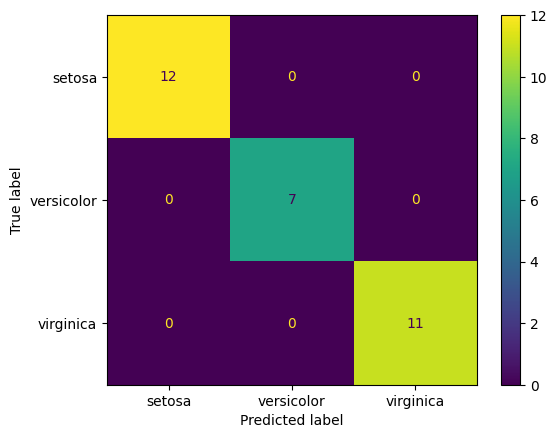

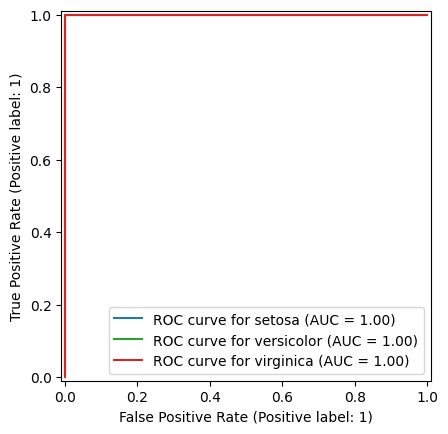

Preprocessing the Breast cancer dataset (569 samples, 30 feature dimensions)
***** Experiments on the Breast cancer dataset *****
Training set mean accuracy: 0.9604
Validation set mean accuracy: 0.9386


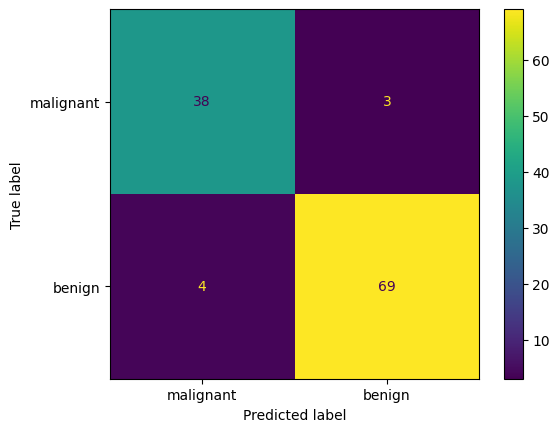

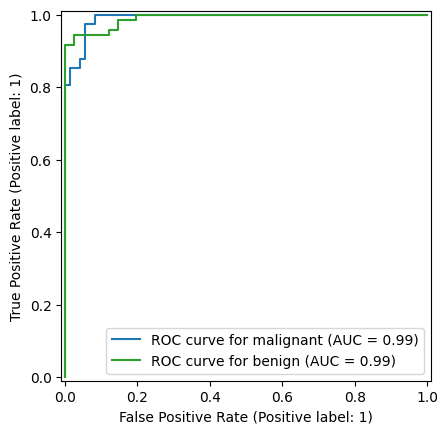

Preprocessing the Digits dataset (1797 samples, 64 feature dimensions)
***** Experiments on the Digits dataset *****
Training set mean accuracy: 1.0000
Validation set mean accuracy: 0.9750


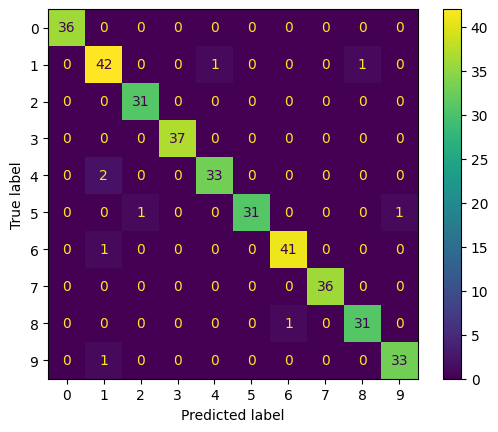

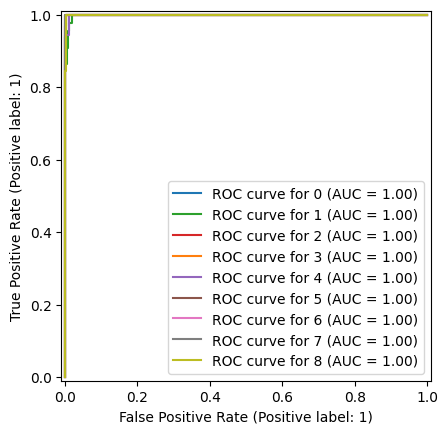

Preprocessing the Wine dataset (178 samples, 13 feature dimensions)
***** Experiments on the Wine dataset *****
Training set mean accuracy: 0.9577
Validation set mean accuracy: 1.0000


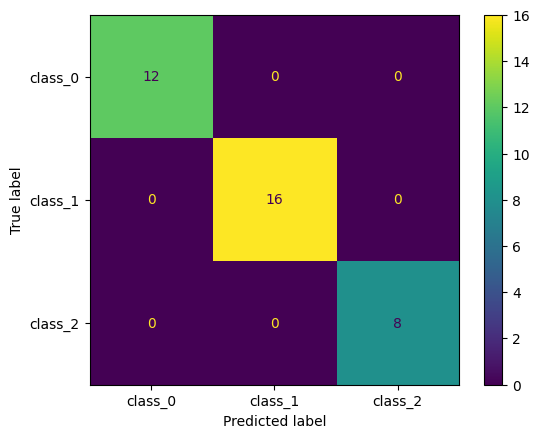

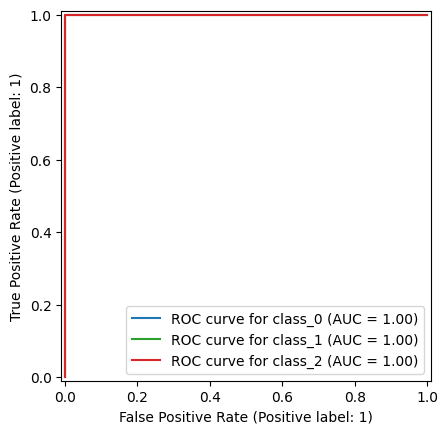

In [8]:
# Zip up all dataset options
dataset_options = zip(
    datasets,
    dataset_names)

# Create a list of colors for display
colors = [
    'tab:blue',
    'tab:green',
    'tab:red',
    'tab:orange',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive'
]

for dataset, dataset_name in dataset_options:

    '''
    Create the training and validation splits
    '''
    X = dataset.data
    y = dataset.target
    labels = dataset.target_names

    # TODO: Get unique labels/targets
    y_unique = np.unique(y)

    print('Preprocessing the {} dataset ({} samples, {} feature dimensions)'.format(dataset_name, X.shape[0], X.shape[1]))

    # Shuffle the dataset based on sample indices
    shuffled_indices = np.random.permutation(X.shape[0])

    # Choose the first 80% as training set and the next 20% as validation
    train_split_idx = int(0.80 * X.shape[0])

    train_indices = shuffled_indices[0:train_split_idx]
    val_indices = shuffled_indices[train_split_idx:]

    # Select the examples from X and y to construct our training, validation, testing sets
    X_train, y_train = X[train_indices, :], y[train_indices]
    X_val, y_val = X[val_indices, :], y[val_indices]

    print('***** Experiments on the {} dataset *****'.format(dataset_name))

    '''
    Train and validate logistic regression on each dataset
    '''
    # TODO: Instantiate logistic regression model with penalty=None
    model_scikit = LogisticRegression(penalty=None)

    # TODO: Train scikit-learn model
    model_scikit.fit(X_train, y_train)


    # TODO: Score model using mean accuracy on training set
    predictions_train = model_scikit.predict(X_train)
    score_train = skmetrics.accuracy_score(y_train, predictions_train)
    print('Training set mean accuracy: {:.4f}'.format(score_train))

    # TODO: Score model using mean accuracy validation set
    predictions_val = model_scikit.predict(X_val)
    score_val = skmetrics.accuracy_score(y_val, predictions_val)
    print('Validation set mean accuracy: {:.4f}'.format(score_val))

    '''
    Plot confusion matrix and receiver operating characteristic (ROC) curve
    '''

    # TODO: Create a confusion matrix using skmetrics.confusion_matrix
    confusion_matrix = skmetrics.confusion_matrix(y_val, predictions_val)

    # TODO: Create a visualization of the confusion matrix using skmetrics.ConfusionMatrixDisplay
    confusion_matrix_plot = skmetrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)

    # TODO: Display the confusion matrix using the plot function
    confusion_matrix_plot.plot()

    # TODO: Predict probabilities using LogisticRegression's predict_proba function
    probabilities_val = model_scikit.predict_proba(X_val)

    # TODO: Create a 1 x 1 subplot in a figure
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # TODO: Using scikit's preprocessing.label_binarize to convert your labels to one-hot vector
    # Note: for binary classification label_binarize will give you a Nx1 vector instead of Nx2
    one_hot_val = skpreprocessing.label_binarize(y_val, classes=y_unique)

    # TODO: Handle binary classification by concatenating the negative (0) class to the Nx1 positive (1) class vector
    if len(labels) < 3:
        one_hot_val = np.concatenate((1 - one_hot_val, one_hot_val), axis=-1)

    # TODO: For each class_id and color, create a RocCurveDisplay
    for class_id, color, label in zip(range(len(labels)), colors, labels):
            skmetrics.RocCurveDisplay.from_predictions(
            one_hot_val[:, class_id],
            probabilities_val[:, class_id],
            name='ROC curve for {}'.format(label),
            color=color,
            ax=ax)

    # TODO: Use show() function from matplotlib (plt) to display plots
    plt.show()

    # Pause to allow plots to show
    time.sleep(1)

